# Exercise - 9
Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset. See if you can get them to produce roughly the same model.

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.base import BaseEstimator
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Loading Dataset

In [3]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

## Scaling Data & Making Models

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
C = 5
alpha = C / len(X_scaled)

In [6]:
alpha

0.05

In [7]:
linear_svc = LinearSVC(loss= 'hinge', C= C, random_state= 42)
svc = SVC(kernel= 'linear', C= C, degree= 1, random_state= 42)
sgd_clf = SGDClassifier(alpha= alpha, random_state= 42)

In [8]:
linear_svc.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.05, random_state=42)

In [9]:
def plot_decision_boundary(clf: BaseEstimator, ax: Axes, *, color: str) -> None:
    DecisionBoundaryDisplay.from_estimator(
        estimator= clf,
        X= X_scaled,
        ax= ax,
        response_method= 'decision_function',
        plot_method= 'contour',
        levels= 0,
        colors= color
    )

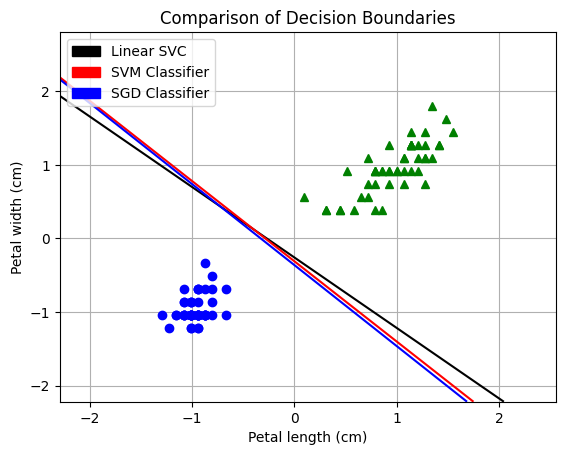

In [10]:
_, ax = plt.subplots()

plot_decision_boundary(linear_svc, ax, color= 'k')
plot_decision_boundary(svc, ax, color= 'r')
plot_decision_boundary(sgd_clf, ax, color= 'b')

linear_svc_patch = mpatches.Patch(color= 'k', label= 'Linear SVC')
svc_patch = mpatches.Patch(color= 'r', label= 'SVM Classifier')
sgd_patch = mpatches.Patch(color= 'b', label= 'SGD Classifier')

plt.plot(X_scaled[y == 0, 0], X_scaled[y == 0, 1], 'bo')
plt.plot(X_scaled[y == 1, 0], X_scaled[y == 1, 1], 'g^')

plt.title('Comparison of Decision Boundaries')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

plt.grid()
plt.legend(handles= [linear_svc_patch, svc_patch, sgd_patch])
plt.show()

All three models seems roughly same